In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import distinctipy
from scipy.interpolate import UnivariateSpline
import glob,os
import matplotlib.colors as colors

import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 14 #12
plt.rcParams['ytick.major.size']  = 14#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

peri=2458013

In [3]:
datfile=pd.read_csv('..//Simulations//oumuamua_traj.csv')
times=datfile['Time'].to_numpy()
tmax=np.max(times)/86400-peri

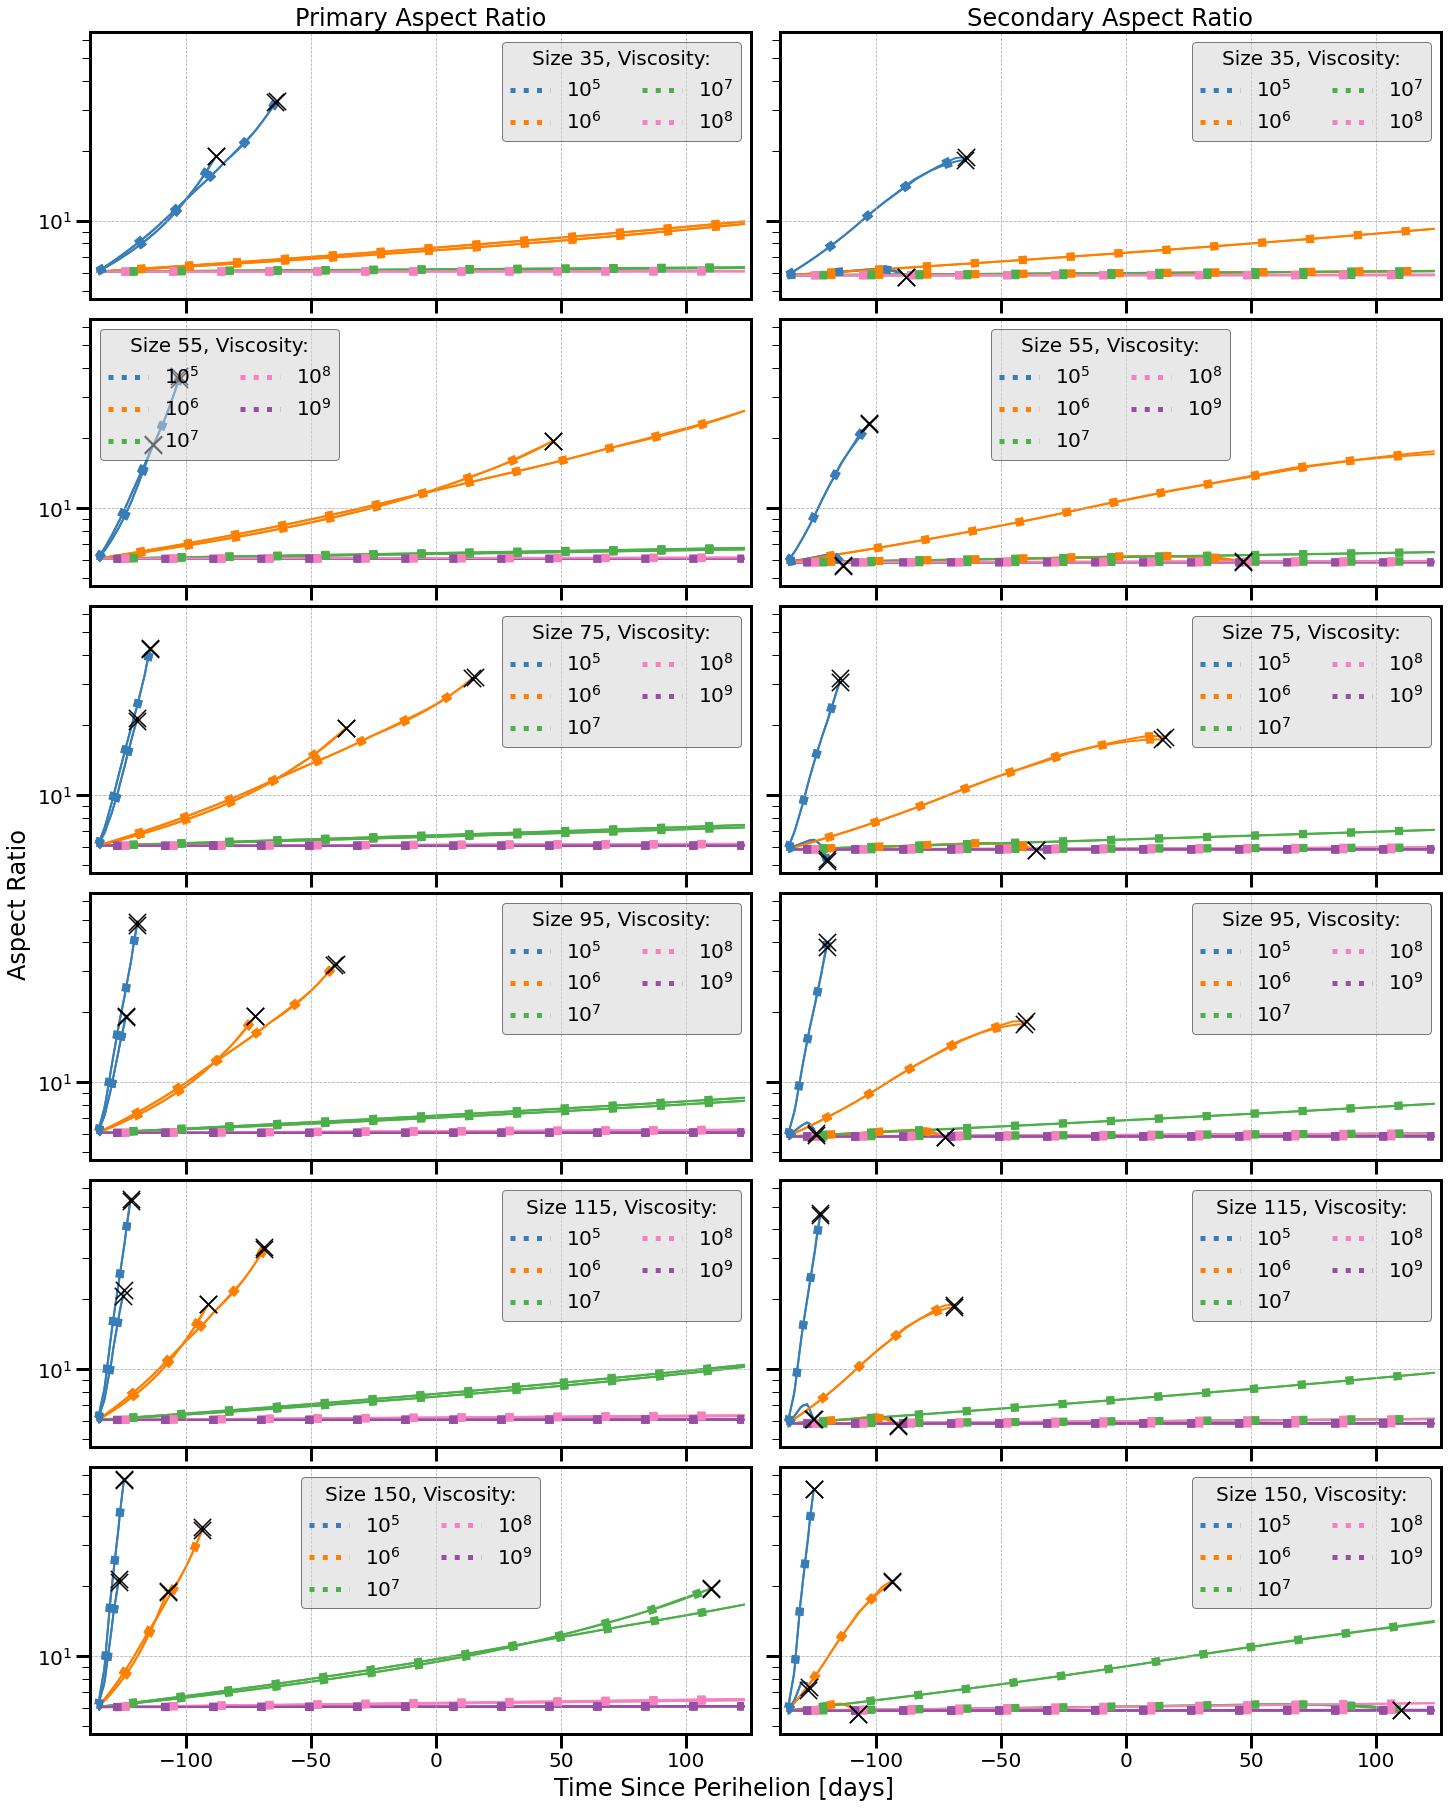

In [12]:
import matplotlib.gridspec as gridspec
from scipy.interpolate import UnivariateSpline,interp1d
import matplotlib

sizes=[35,55,75,95,115,150]

cvals=np.linspace(0,1,5)
cols=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#984ea3']

fig,axes=plt.subplots(len(sizes),2,figsize=(20,25),sharex=True,sharey=True,constrained_layout=True)

for i,s in enumerate(sizes):
    
    handles=[]
    mumax=0
    for file in glob.glob("../Simulations/logs/*pancake?_*a"+str(s)+"*.csv"):  
        mu=int(file.split("_")[-1][:-4])
        mumax=max(mu,mumax)
        pancake=pd.read_csv(file,names=['Times',"MoIs","a","b","c"]).drop(np.nan,axis=0)
        times=pancake['Times'].to_numpy(dtype=float)/86400-peri
        
        converge=(np.max(times)>=tmax)
        
        a=pancake['a'].to_numpy(dtype=float)
        b=pancake['b'].to_numpy(dtype=float)
        c=pancake['c'].to_numpy(dtype=float)
        
        maxax=np.maximum(np.maximum(a,b),c)
        minax=np.minimum(np.minimum(a,b),c)
        secax=np.sort(np.array([a,b,c]),axis=0)[1,:]
        
        axes[i][0].plot(times,maxax/minax,color=cols[mu-5],label=mu,linewidth=2,zorder=1)
        axes[i][0].plot(times,maxax/minax,color=cols[mu-5],label=mu,linewidth=8,linestyle=(mu-5,(1,5)),zorder=2)
        
        axes[i][1].plot(times,secax/minax,color=cols[mu-5],label=mu,linewidth=2,zorder=1)
        axes[i][1].plot(times,secax/minax,color=cols[mu-5],label=mu,linewidth=8,linestyle=(mu-5,(1,5)),zorder=2)
        
        if not converge:
            axes[i][0].scatter(times[-1],maxax[-1]/minax[-1],color='k',alpha=1,marker='x',s=300,zorder=3)
            axes[i][1].scatter(times[-1],secax[-1]/minax[-1],color='k',alpha=1,marker='x',s=300,zorder=3)
        
    for mu in range(5,mumax+1):
        handles.append(plt.Line2D([0,1],[0,1],linestyle='dotted',color=cols[mu-5],linewidth=5,label='$10^{%s}$'%mu))
    
    for ax in axes[i]:     
        ax.grid(linestyle='dashed')
        ax.legend(handles=handles,ncol=2,title='Size '+str(s)+', Viscosity:',
                  fancybox=True,edgecolor='black',facecolor='lightgray',framealpha=0.5)
        ax.set_yscale('log')
        ax.set_xlim([np.min(times)-3,np.max(times)+3])

fig.supxlabel("Time Since Perihelion [days]")
fig.supylabel("Aspect Ratio")
axes[0][0].set_title("Primary Aspect Ratio")
axes[0][1].set_title("Secondary Aspect Ratio")

plt.savefig('principal_axis_aspect_ratio.pdf',
           bbox_inches='tight',dpi=300)

In [5]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    #         rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

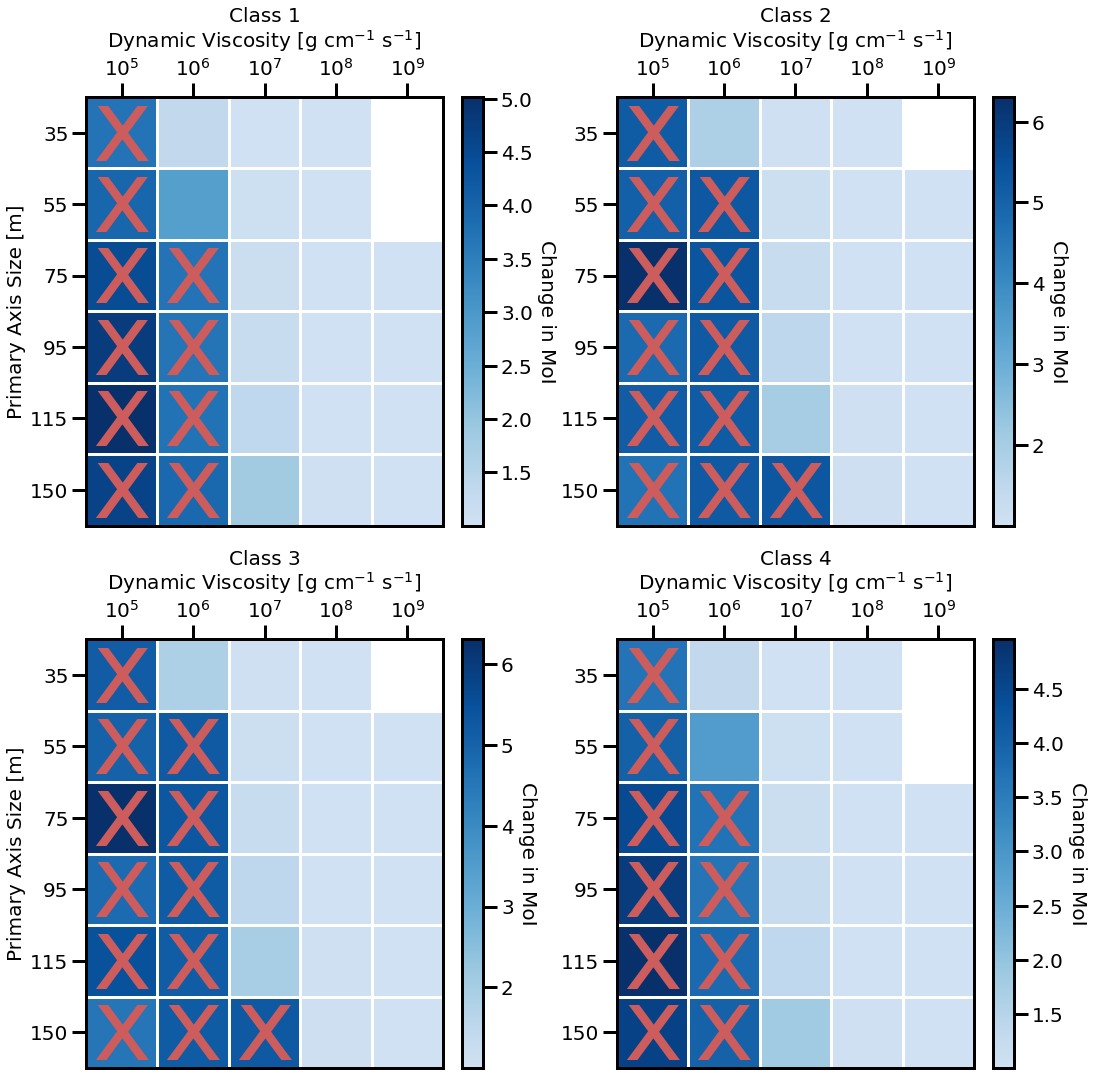

In [22]:
sizes=[35,55,75,95,115,150]

cmap = colors.LinearSegmentedColormap.from_list("test",plt.get_cmap('Blues')(np.linspace(0.2,1,100)))
cmap.set_bad('white')

fmt=matplotlib.ticker.FuncFormatter(lambda x,pos: np.where(x,'x',''))

fig,axes=plt.subplots(2,2,figsize=(15,15),sharex=True,sharey=False,constrained_layout=True)

axes=axes.flatten()

for ind in [0,2,1,3]:
    ratio=np.zeros((6,5))
    ratio[:]=np.nan
    annotate=np.zeros((6,5),dtype=bool)

    for i,s in enumerate(sizes):
        for j in range(5):
            mu=j+5
            for file in glob.glob("../Simulations/logs/*pancake"+str(ind+1)+"_*a"+str(s)+"_"+str(mu)+".csv"): 
                pancake=pd.read_csv(file,names=['Times',"MoIs","a","b","c"]).drop(np.nan,axis=0)
                moi=pancake['MoIs'].to_numpy(dtype=float)

                ratio[i,j]=moi[-1]/moi[0]

                if np.max(pancake['Times'].to_numpy(dtype=float)/86400-peri)<tmax:
                    annotate[i,j]=True
    ax=axes[ind]
    
    labs=[r'$10^{{{}}}$'.format(elem) for elem in np.arange(5,10)]

    im,cbar=heatmap(ratio,row_labels=sizes,col_labels=labs,cbarlabel="Change in MoI",cmap=cmap,ax=ax)
    annotate_heatmap(im, data=annotate, valfmt=fmt, size=100, c='indianred')
    ax.set_xlabel(r"Dynamic Viscosity [g cm$^{-1}$ s$^{-1}$]", labelpad=10)  
    ax.xaxis.set_label_position('top') 
    if ind%2==0:ax.set_ylabel("Primary Axis Size [m]")
    #else: ax.set_ylabel("Primary Axis Size [m]",labelpad=25)
    ax.set_title("Class "+str(ind+1),fontsize=20)

plt.savefig("principal_axis_heatmap.pdf",
           bbox_inches='tight',dpi=300)

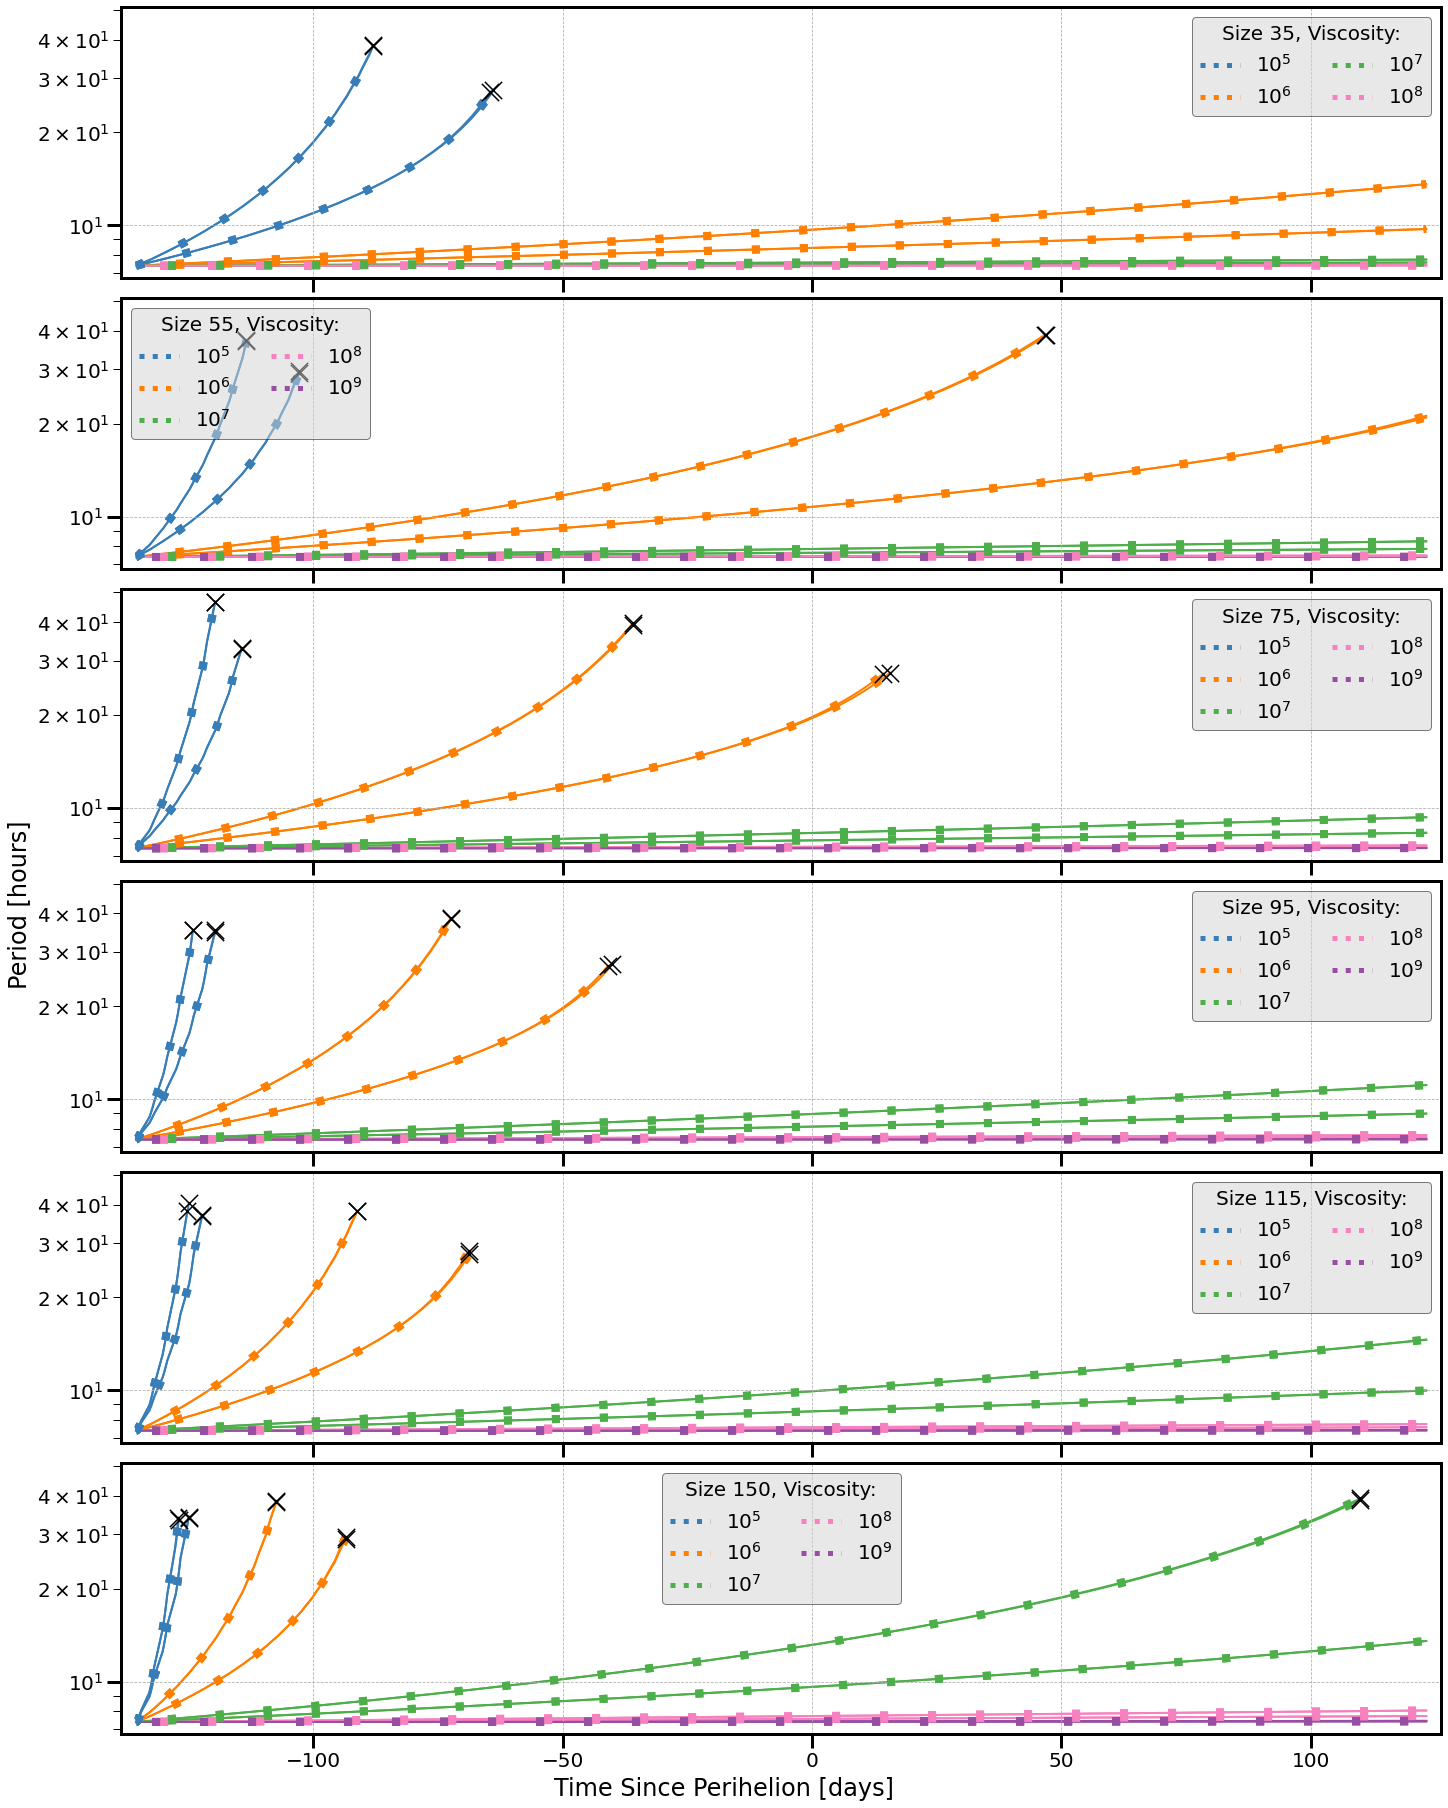

In [13]:
import matplotlib.gridspec as gridspec
from scipy.interpolate import UnivariateSpline,interp1d
import matplotlib

pinit=7.3919

sizes=[35,55,75,95,115,150]

cvals=np.linspace(0,1,5)
cols=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#984ea3']

fig,axes=plt.subplots(len(sizes),1,figsize=(20,25),sharex=True,sharey=True,constrained_layout=True)

for i,s in enumerate(sizes):
    
    handles=[]
    mumax=0
    for file in glob.glob("../Simulations/logs/*pancake?_*a"+str(s)+"*.csv"):  
        mu=int(file.split("_")[-1][:-4])
        mumax=max(mu,mumax)
        pancake=pd.read_csv(file,names=['Times',"MoIs","a","b","c"]).drop(np.nan,axis=0)
        times=pancake['Times'].to_numpy(dtype=float)/86400-peri
        
        converge=(np.max(times)>=tmax)
        
        moi=pancake['MoIs'].to_numpy(dtype=float)
        
        per=pinit*moi/moi[0]
        
        axes[i].plot(times,per,color=cols[mu-5],label=mu,linewidth=2,zorder=1)
        axes[i].plot(times,per,color=cols[mu-5],label=mu,linewidth=8,linestyle=(mu-5,(1,5)),zorder=2)
        
        if not converge:
            axes[i].scatter(times[-1],per[-1],color='k',alpha=1,marker='x',s=300,zorder=3)
        
    for mu in range(5,mumax+1):
        handles.append(plt.Line2D([0,1],[0,1],linestyle='dotted',color=cols[mu-5],linewidth=5,label='$10^{%s}$'%mu))
    
    axes[i].grid(linestyle='dashed')
    axes[i].legend(handles=handles,ncol=2,title='Size '+str(s)+', Viscosity:',
              fancybox=True,edgecolor='black',facecolor='lightgray',framealpha=0.5)
    axes[i].set_yscale('log')
    axes[i].set_xlim([np.min(times)-3,np.max(times)+3])

fig.supxlabel("Time Since Perihelion [days]")
fig.supylabel("Period [hours]")

plt.savefig('principal_axis_periods.pdf',
           bbox_inches='tight',dpi=300)